# Sep 25, 2023: mouse whole brain fMRI: svinet overlapping communities

In [1]:
import csv
import os
import numpy as np
import pandas as pd
import scipy as sp 
import pickle 
from os.path import join as pjoin
from itertools import product
from tqdm import tqdm
from copy import deepcopy
from pathlib import Path
import subprocess
import random

# nilearn
from nilearn import image, plotting

# networkx
import networkx as nx
from cdlib import NodeClustering, evaluation, algorithms

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow

plt.rcParamsDefault['font.family'] = "sans-serif"
plt.rcParamsDefault['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 14
plt.rcParams["errorbar.capsize"] = 0.5

import cmasher as cmr  # CITE ITS PAPER IN YOUR MANUSCRIPT

# ignore user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
class ARGS():
    pass

args = ARGS()

In [3]:
nw_path = '/home/govindas/network_estimation/results/svinet'
nw_file = f'{nw_path}/n1000-k28-mmsb-linksampling/gml/network.gml'

G = nx.read_gml(nw_file, label='id')

<AxesSubplot: >

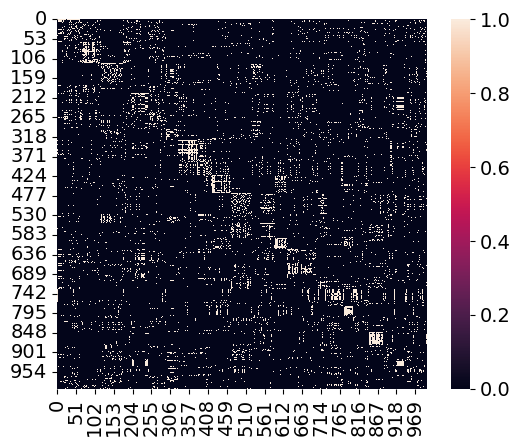

In [4]:
A = nx.adjacency_matrix(G).todense()
sns.heatmap(A, square=True)

In [5]:
def get_coms(com_file):
    with open(com_file, 'r') as f:
        file_lines = [line[:-1] for line in f if line.strip() != '']

    coms = [
        [np.int(idx) for idx in line.split()] 
        for line in file_lines
    ]
    return NodeClustering(coms, graph=None,)

In [6]:
f1 = f'{nw_path}/n1000-k28-linkthresh0.5-linksampling/communities.txt'
f2 = f'{nw_path}/n1000-k28-linkthresh0.9-linksampling/communities.txt'

com1 = get_coms(f1)
com2 = get_coms(f2)
# random.shuffle(com2.communities)
e = evaluation.overlapping_normalized_mutual_information_MGH(com1, com2)
e

MatchingResult(score=1, std=None)

---

In [23]:
brain_mask_file = (
    f'/home/govindas/mouse_dataset/voxel/commonspace_mask'
    f'/_scan_info_subject_idSLC01.session1_split_name_sub-SLC01_ses-1_acq-isotropic_T1w'
    f'/_run_1'
    f'/sub-SLC01_ses-1_task-rest_run-1_bold_EPI_brain_mask.nii.gz'
)
brain_mask_img = image.load_img(brain_mask_file)

ts_file = (
    f'/home/govindas/mouse_dataset/voxel/cleaned_timeseries'
    f'/_split_name_sub-SLC01_ses-1_task-led_run-6_bold'
    f'/sub-SLC01_ses-1_task-led_run-6_bold_combined_cleaned.nii.gz'
)

In [24]:
from nilearn.maskers import NiftiMasker

brain_masker = NiftiMasker(
    mask_img=brain_mask_img,
)
ts = brain_masker.fit_transform(
    ts_file,
)
ts.shape

(456, 44112)

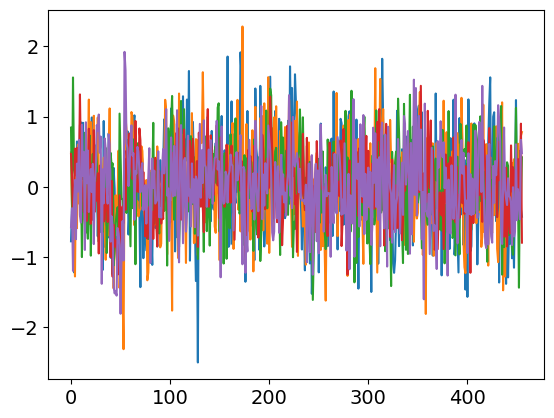

In [25]:
plt.plot(ts[:, [234, 992, 12456, 12, 3]])

In [26]:
ts_img = brain_masker.inverse_transform(
    ts
)
ts_img = image.new_img_like(
    ref_niimg=brain_mask_img,
    data=ts_img.get_fdata(),
    copy_header=True,
).to_filename('ts_img.nii.gz')


---

In [28]:
ts_file = (
    f'/home/govindas/mouse_dataset/voxel/tmp/ts.txt'
)
ts = np.loadtxt(ts_file)
ts.shape

(44112, 525)

In [35]:
ts[4565, :25]

array([42.      , 21.      , 18.      ,  0.256123,  0.975965, -0.494901,
       -0.284499,  0.274499,  0.159307, -0.350292,  0.264804, -0.626682,
       -0.534468, -0.16414 ,  0.329295, -0.145782, -0.073423,  0.172459,
       -0.13654 ,  0.079519, -0.21556 ,  0.389872,  0.264909,  0.452317,
        0.139244])